## feature selection

In [2]:
# generate training data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
N = 100
x = np.random.uniform(-1,1,N)
x = np.sort(x)
x[0]=-1
x[N-1]=1
y = (x-.95)*(x-.6)*(x-.25)*(x+.5)*(x+.9) + .03*np.random.randn(N)
# generate test data
N_ = 100
x_ = np.random.uniform(-1,1,N_)
y_ = (x_-.95)*(x_-.6)*(x_-.25)*(x_+.5)*(x_+.9) + .03*np.random.randn(N_)

import matplotlib.pyplot as plt
t = np.linspace(-1,1,100)
y0 = (t-.95)*(t-.6)*(t-.25)*(t+.5)*(t+.9)
plt.plot(x,y,'o')
plt.plot(t,y0,'g-')
plt.show()

<Figure size 640x480 with 1 Axes>

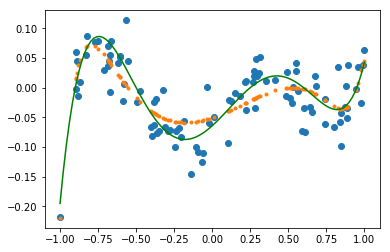

In [97]:
# L2 loss regression fit
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=100000, tol=1e-12,loss='squared_loss')
# fit the model for varying lambda
p=50
X = np.ones(len(x))
X_= np.ones(len(x_))
for j in range(p+1):
    X = np.c_[x**(j+1), X]
    X_= np.c_[x_**(j+1),X_]
clf.fit(X, y)
# compute the predicted values for both train and test datasets
y_pred = clf.predict(X_)
ypred  = clf.predict(X)
r =y-ypred
r_=y_-y_pred

import matplotlib.pyplot as plt
t = np.linspace(-1,1,100)
y0 = (t-.95)*(t-.6)*(t-.25)*(t+.5)*(t+.9)
plt.plot(x,y.T,'o')
plt.plot(x,ypred,'.')
plt.plot(t,y0,'g-')
plt.show()


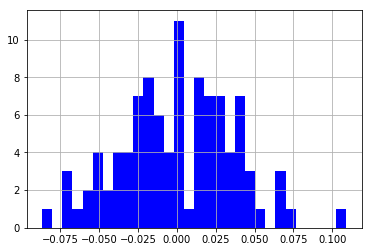

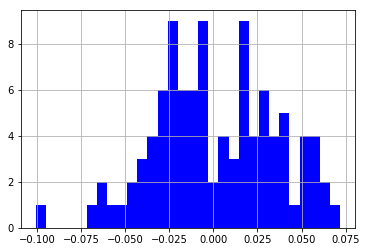

In [98]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(r, bins=30, facecolor='b')
#plt.axis([-1.5, 1.5, 0., 30.])
plt.grid(True)
#t = (0.12*np.arange(50)-3)
#plt.plot(t,10*t**2,'-r')
plt.show()

n, bins, patches = plt.hist(r_, bins=30, facecolor='b')
#plt.axis([-1.5, 1.5, 0., 30.])
plt.grid(True)
#t = (0.12*np.arange(50)-3)
#plt.plot(t,10*t**2,'-r')
plt.show()


In [100]:
# L1 with epsilon loss regression fit
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=100000, tol=1e-12,loss='epsilon_insensitive',epsilon=.05)
# fit the model for varying lambda
clf.fit(X, y)
# compute the predicted values for both train and test datasets
y_pred = clf.predict(X_)
ypred  = clf.predict(X)
r =y - ypred
r_=y_ - y_pred


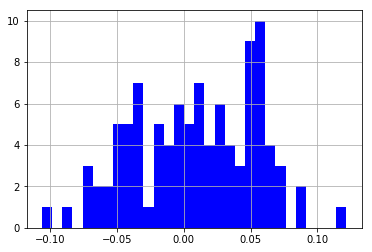

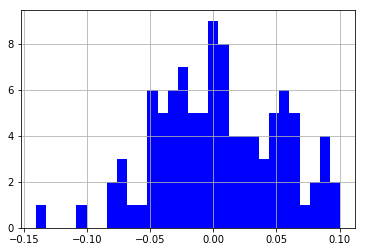

In [101]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(r, bins=30, facecolor='b')
#plt.axis([-1.5, 1.5, 0., 30.])
plt.grid(True)
#t = (0.12*np.arange(50)-3)
#plt.plot(t,10*t**2,'-r')
plt.show()

n, bins, patches = plt.hist(r_, bins=30, facecolor='b')
#plt.axis([-1.5, 1.5, 0., 30.])
plt.grid(True)
#t = (0.12*np.arange(50)-3)
#plt.plot(t,10*t**2,'-r')
plt.show()

In [84]:
y.shape

(100,)

In [85]:
ypred.shape

(100,)

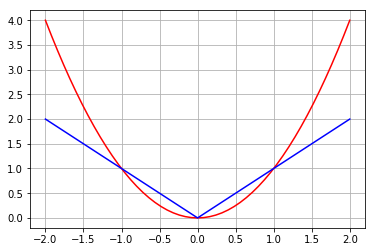

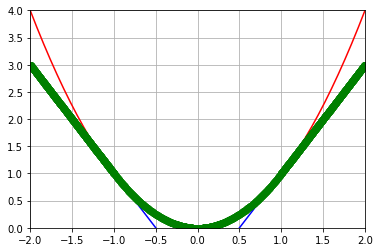

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


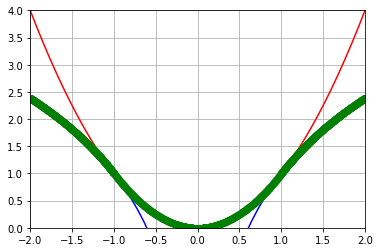

In [164]:
#plt.axis([-1.5, 1.5, 0., 30.])
plt.grid(True)
t = np.arange(0,51)*0.08-2
plt.plot(t,t**2,'-r')
plt.plot(t,np.absolute(t),'-b')
plt.show()

plt.grid(True)
t = np.arange(0,51)*0.08-2
plt.plot(t,t**2,'-r')
a=1.
plt.plot(t,a*2*np.absolute(t)-a**2,'-b')
plt.axis([-2., 2., 0., 4.])
t = np.arange(0,501)*0.004-1
plt.plot(t,t**2,'og')
t = np.arange(0,501)*0.002-2
plt.plot(t,a*2*np.absolute(t)-a**2,'og')
t = np.arange(0,501)*0.002+1
plt.plot(t,a*2*np.absolute(t)-a**2,'og')
plt.show()

plt.grid(True)
t = np.arange(0,51)*0.08-2
plt.plot(t,t**2,'-r')
a=1.
plt.plot(t,a**2*(1-2*np.log(a)+np.log(t**2)),'-b')
plt.axis([-2., 2., 0., 4.])
t = np.arange(0,501)*0.004-1
plt.plot(t,t**2,'og')
t = np.arange(0,501)*0.002-2
plt.plot(t,a**2*(1-2*np.log(a)+np.log(t**2)),'og')
t = np.arange(0,501)*0.002+1
plt.plot(t,a**2*(1-2*np.log(a)+np.log(t**2)),'og')
plt.show()

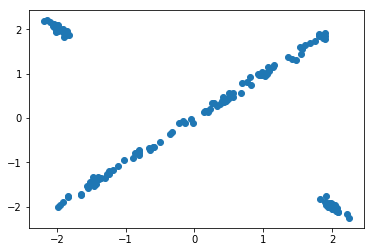

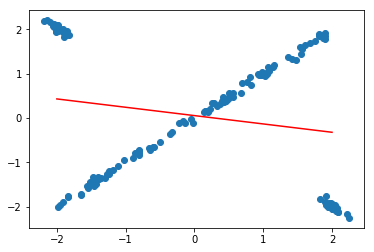

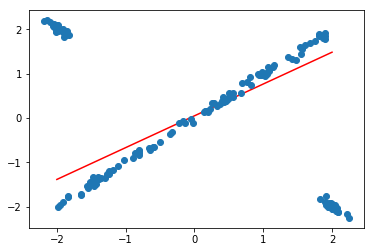

In [186]:
# generate training data
import numpy as np
import matplotlib.pyplot as plt
N = 100
x = np.random.uniform(-1,1,N)
x = np.sort(x)
y = x + .03*np.random.randn(N)
Nadd = 25
x_add = -1 + .05*np.random.randn(Nadd)
y_add = - x_add + .03*np.random.randn(Nadd)
x = np.c_[[x.T], [x_add.T]]
y = np.c_[[y.T], [y_add.T]]
Nadd = 25
x_add = 1 + .05*np.random.randn(Nadd)
y_add = - x_add + .03*np.random.randn(Nadd)
x = np.c_[x, [x_add]]
y = np.c_[y, [y_add]]

x=x*2
y=y*2

import matplotlib.pyplot as plt
t = np.linspace(-1,1,100)
plt.plot(x.T,y.T,'o')
plt.show()


from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(x.T,y.T)
plt.plot([-2,2],[linreg.intercept_ - 2*linreg.coef_[0],linreg.intercept_ + 2*linreg.coef_[0]],'-r')
plt.plot(x.T,y.T,'o')
plt.show()

from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(epsilon=1.0).fit(x.T, y.T)
plt.plot([-2,2],[huber.intercept_ - 2*huber.coef_[0], huber.intercept_ + 2*huber.coef_[0]],'-r')
plt.plot(x.T,y.T,'o')
plt.show()



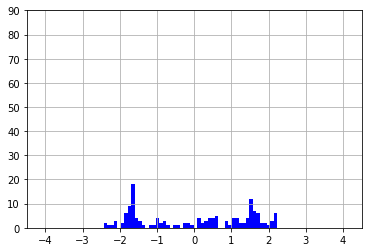

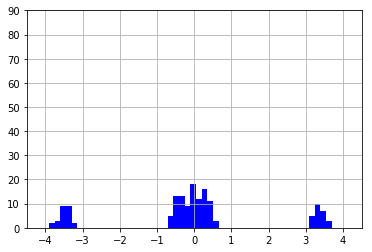

In [187]:
ypred = linreg.intercept_ + x*linreg.coef_[0]
n, bins, patches = plt.hist(y.T-ypred.T, bins=50, facecolor='b')
plt.axis([-4.5, 4.5, 0., 90.])
plt.grid(True)
plt.show()

ypred = huber.intercept_ + x*huber.coef_[0]
n, bins, patches = plt.hist(y.T-ypred.T, bins=50, facecolor='b')
plt.axis([-4.5, 4.5, 0., 90.])
plt.grid(True)
plt.show()



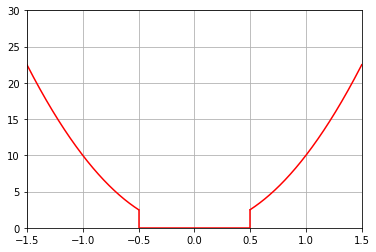

In [185]:
plt.axis([-1.5, 1.5, 0., 30.])
plt.grid(True)
t = np.arange(0,501)*0.002-1.5
plt.plot(t,10*t**2,'-r')
t = np.arange(0,501)*0.002+.5
plt.plot(t,10*t**2,'-r')
plt.plot([-0.5,-0.5,0.5,0.5],[2.5,0,0,2.5],'-r')
plt.show()

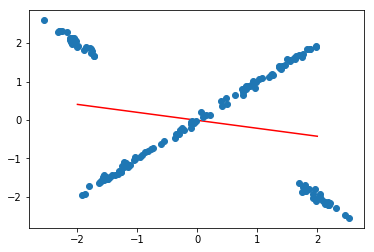

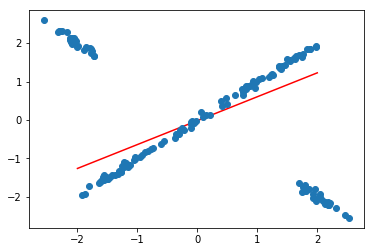

In [211]:
# generate training data
import numpy as np
import matplotlib.pyplot as plt
N = 100
x = np.random.uniform(-1,1,N)
x = np.sort(x)
y = x + .03*np.random.randn(N)
Nadd = 26
x_add = -1 + .1*np.random.randn(Nadd)
y_add = - x_add + .03*np.random.randn(Nadd)
x = np.c_[[x.T], [x_add.T]]
y = np.c_[[y.T], [y_add.T]]
Nadd = 26
x_add = 1 + .1*np.random.randn(Nadd)
y_add = - x_add + .03*np.random.randn(Nadd)
x = np.c_[x, [x_add]]
y = np.c_[y, [y_add]]

x=x*2
y=y*2


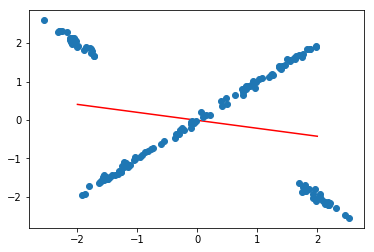

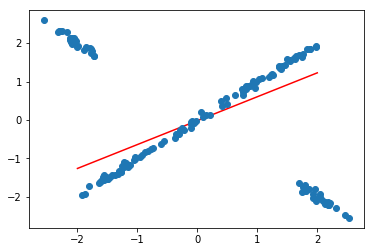

In [212]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(x.T,y.T)
plt.plot([-2,2],[linreg.intercept_ - 2*linreg.coef_[0],linreg.intercept_ + 2*linreg.coef_[0]],'-r')
plt.plot(x.T,y.T,'o')
plt.show()

from sklearn.linear_model import HuberRegressor
huber = HuberRegressor(epsilon=1.0).fit(x.T, y.T)
plt.plot([-2,2],[huber.intercept_ - 2*huber.coef_[0], huber.intercept_ + 2*huber.coef_[0]],'-r')
plt.plot(x.T,y.T,'o')
plt.show()




# Quantile regression

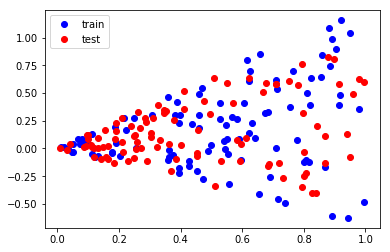

In [110]:
# generate training data
import numpy as np
import matplotlib.pyplot as plt
N = 100
x = np.random.uniform(0,1,N)
x = np.sort(x)
y = 0.3*x + 1.0*x*np.random.uniform(-1,1,N)
N_ = 100
x_ = np.random.uniform(0,1,N)
x_ = np.sort(x_)
y_ = 0.3*x_ + 1.0*x_*np.random.uniform(-1,1,N_)
plt.plot(x.T,y.T,'ob',label='train')
plt.plot(x_.T,y_.T,'or',label='test')
plt.legend()
plt.show()

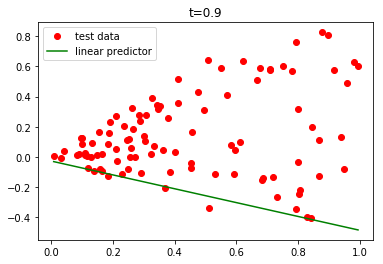

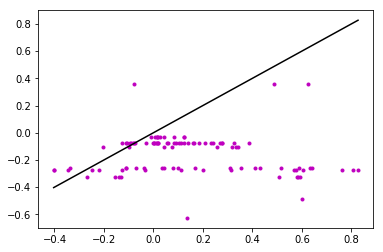

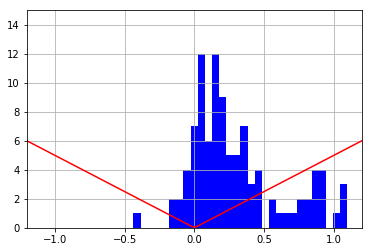

In [135]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(tol=1e-12,loss='quantile',alpha=0.1)
# fit the model for varying lambda
p=0
X = np.ones(len(x))
X_= np.ones(len(x_))
for j in range(p+1):
    X = np.c_[x**(j+1), X]
    X_= np.c_[x_**(j+1),X_]
clf.fit(X, y)
# compute the predicted values for both train and test datasets
y_pred = clf.predict(X_)
ypred  = clf.predict(X)
r =y-ypred
r_=y_-y_pred

plt.plot(x_.T,y_.T,'or',label='test data')
plt.plot([np.min(x_), np.max(x_)],clf.predict([[np.min(x_),1],[np.max(x_),1]]) ,'g-',label='linear predictor')
plt.legend()
plt.title('t=0.9')
plt.show()

plt.plot(y_.T,y_pred,'.m',label='prediction')
plt.plot([np.min(y_), np.max(y_)],[np.min(y_), np.max(y_)],'k' )
plt.show()

n, bins, patches = plt.hist(r_, bins=30, facecolor='b')
plt.axis([-1.2, 1.2, 0., 15])
plt.grid(True)
t = np.linspace(-1.2,1.2,100)
plt.plot(t,10*(0.5*np.absolute(t) + (0.5-0.5)*t) ,'-r')
plt.show()

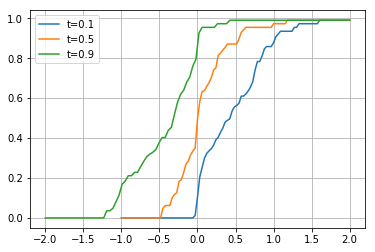

In [131]:
t=np.linspace(-2,2,100)
#cdf3 = np.zeros(len(t))
#for i in np.arange(len(t)):
#    cdf3[i] = np.sum(np.where([r]<t[i]))
t1=np.linspace(-1,2,100)
plt.plot(t1,cdf1/float(5000),label='t=0.1')
plt.plot(t1,cdf2/float(5000),label='t=0.5')
plt.plot(t,cdf3/float(5000),label='t=0.9')
plt.legend()
plt.grid()
plt.show()

# gradient descsent visualization

In [780]:
t=0
T=100
w0__=np.zeros(T)
w1__=np.zeros(T)
w0__[0]=2
w1__[0]=.5
eta=1.5
A = np.c_[x, np.ones(x.shape)]

### gradient descent with L2 loss is not robust against outliers

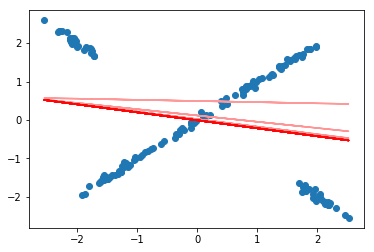

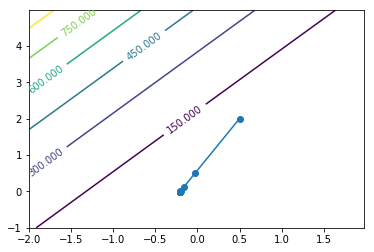

In [753]:

# linear regression step-by-step
from numpy.linalg import inv
H = inv(np.matmul(A.T,A))
res = A.dot(np.append(w1__[t],w0__[t]))-y.T
#grd = 0.5*(np.matmul(H,np.matmul(A.T,res.T)))

grd = 0
for i in np.arange(len(y)):
    grd= grd + A[i]*(A[i].dot(np.append(w1__[t],w0__[t])) - y[i])

grd = 0.5*(np.matmul(H,grd))
    
w0__[t+1] = w0__[t] - eta*grd[1]
w1__[t+1] = w1__[t] - eta*grd[0]
t=t+1

import matplotlib.pyplot as plt
plt.plot(x,y,'o')
for i in range(t):
    plt.plot(x, w1__[i+1]*x + w0__[i+1], color=(1.,0.6*(1-(i/float(t))),0.6*(1-(i/float(t)))))
plt.show()

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.025
x_ = np.arange(-2, 2.0, delta)
y_ = np.arange(-1.0, 5.0, delta)
X, Y = np.meshgrid(x_, y_)
Z = np.zeros(X.shape)
for i in range(10):
    Z = Z+(A[i,0]*X + A[i,1]*Y-y[i])**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(w1__[0:t+1],w0__[0:t+1],'-o')

## robust gradient descent

In [825]:
t=0
T=100
w0__=np.zeros(T)
w1__=np.zeros(T)
w0__[0]=2
w1__[0]=.5
eta=1.5
A = np.c_[x, np.ones(x.shape)]

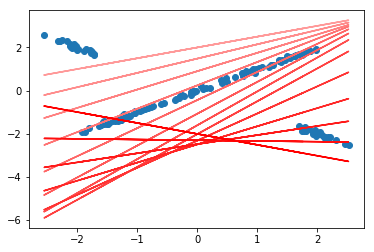

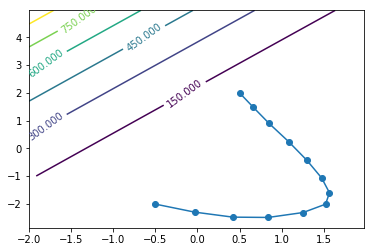

In [837]:
# linear regression step-by-step
from numpy.linalg import inv
H = inv(np.matmul(A.T,A))
H = np.identity(2)
res = A.dot(np.append(w1__[t],w0__[t]))-y.T
#grd = 0.5*(np.matmul(H,np.matmul(A.T,res.T)))

candidate = np.zeros((len(y) ,2))
mag = np.zeros(len(y))
for i in np.arange(len(y)):
    candidate[i] = (A[i].dot(np.append(w1__[t],w0__[t])) - y[i])
    mag[i] = (A[i].dot(np.append(w1__[t],w0__[t])) - y[i])**2
mag_ = np.median(mag)

J = int(np.floor(len(y)/float(2)))
j = np.zeros(J)
for k in range(J):
    j[k] = np.argmin(np.absolute(mag-mag_))
    mag[int(j[k])] = mag_+np.max(mag)-np.min(mag)
    grd = grd + A[int(j[k])]*candidate[int(j[k])]

eta = 0.001
w0__[t+1] = w0__[t] - eta*grd[1]
w1__[t+1] = w1__[t] - eta*grd[0]
t=t+1

import matplotlib.pyplot as plt
plt.plot(x,y,'o')
for i in range(t+1):
    plt.plot(x, w1__[i]*x + w0__[i], color=(1.,0.6*(1-(i/float(t))),0.6*(1-(i/float(t)))))
plt.show()

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
delta = 0.025
x_ = np.arange(-2, 2.0, delta)
y_ = np.arange(-1.0, 5.0, delta)
X, Y = np.meshgrid(x_, y_)
Z = np.zeros(X.shape)
for i in range(10):
    Z = Z+(A[i,0]*X + A[i,1]*Y-y[i])**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(w1__[0:t+1],w0__[0:t+1],'-o')

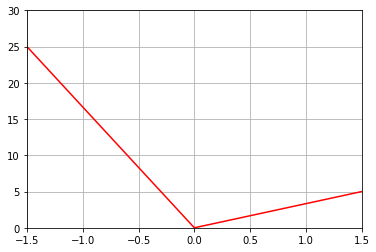

In [4]:
plt.axis([-1.5, 1.5, 0., 30.])
plt.grid(True)
plt.plot([-1.5,0,1.5],[25,0,5],'-r')
plt.show()

In [32]:
X

array([[ 9.24916879e-01, -9.61725989e-01,  1.00000000e+00],
       [ 9.17421149e-01, -9.57821042e-01,  1.00000000e+00],
       [ 9.16802463e-01, -9.57498023e-01,  1.00000000e+00],
       [ 8.78680039e-01, -9.37379346e-01,  1.00000000e+00],
       [ 8.16568341e-01, -9.03641711e-01,  1.00000000e+00],
       [ 7.89216717e-01, -8.88378701e-01,  1.00000000e+00],
       [ 7.48381284e-01, -8.65090333e-01,  1.00000000e+00],
       [ 6.74238523e-01, -8.21120285e-01,  1.00000000e+00],
       [ 6.06274037e-01, -7.78636011e-01,  1.00000000e+00],
       [ 5.86148470e-01, -7.65603337e-01,  1.00000000e+00],
       [ 5.60127902e-01, -7.48416930e-01,  1.00000000e+00],
       [ 4.91085587e-01, -7.00774990e-01,  1.00000000e+00],
       [ 4.85807532e-01, -6.96998947e-01,  1.00000000e+00],
       [ 4.63738978e-01, -6.80983831e-01,  1.00000000e+00],
       [ 4.14966892e-01, -6.44179239e-01,  1.00000000e+00],
       [ 3.89634920e-01, -6.24207433e-01,  1.00000000e+00],
       [ 3.59661461e-01, -5.99717818e-01

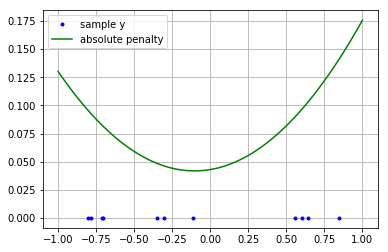

In [108]:
import numpy as np
import matplotlib.pyplot as plt

y=np.random.uniform(-1,1,11)
plt.grid(True)
t=np.linspace(-1,1,100)
r=np.zeros(len(t))
for i in range(len(t)):
    r[i] = (1/float(100))*np.sum(np.absolute(y-t[i])**2)
plt.plot(y,np.zeros(len(y)),'.b',label='sample y')
plt.plot(t,r,'-g',label='absolute penalty')
plt.legend()
plt.show()

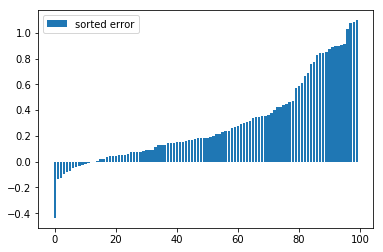

In [136]:
s_ = np.sort(r_)
plt.bar(np.arange(len(s_)),s_,label='sorted error')
plt.legend()
plt.show()

In [125]:
s_

array([-1.02448207, -1.02220484, -0.66807459, -0.57033231, -0.49757101,
       -0.42469194, -0.42228276, -0.41488298, -0.3837399 , -0.36665904,
       -0.36517952, -0.35892764, -0.3329005 , -0.31771403, -0.29111107,
       -0.28299313, -0.2798696 , -0.25137991, -0.22437301, -0.21453327,
       -0.2007768 , -0.19697315, -0.18757521, -0.17553179, -0.17512717,
       -0.1433145 , -0.13895843, -0.11308478, -0.10721011, -0.10427139,
       -0.100003  , -0.08730857, -0.08285228, -0.07984032, -0.07735346,
       -0.06975364, -0.06877189, -0.06512908, -0.06131105, -0.05693567,
       -0.04315556, -0.03740118, -0.03518662, -0.03227128, -0.02321183,
       -0.02101841, -0.00970398, -0.00643539, -0.00506261,  0.00950954,
        0.01752566,  0.02210894,  0.02440935,  0.02931728,  0.03290575,
        0.03577871,  0.03802196,  0.04321668,  0.04995956,  0.06151389,
        0.06381685,  0.07169211,  0.07269518,  0.07294566,  0.07812581,
        0.10028074,  0.10205957,  0.10497935,  0.10914656,  0.16